# Importing all Necessary Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.preprocessing
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Data Import

In [2]:
ds = pd.read_csv('S015.csv')

In [3]:
ds.head()

,timestamp,index,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
0,2019-01-12 00:00:00.000,0,-0.999492,0.023192,0.025461,-0.935965,0.023979,-0.355521,6
1,2019-01-12 00:00:00.020,1,-0.995551,0.021414,0.042297,-0.928875,0.029540,-0.371151,6
2,2019-01-12 00:00:00.040,2,-0.989507,0.012187,0.038830,-0.942907,0.019677,-0.359649,6
3,2019-01-12 00:00:00.060,3,-0.991327,0.015926,0.056181,-0.942363,0.009682,-0.348916,6
4,2019-01-12 00:00:00.080,4,-0.997368,0.014239,0.035168,-0.930852,0.012002,-0.357421,6


In [4]:
ds.describe()

,index,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,label
count,418392.000000,418392.000000,418392.000000,418392.000000,418392.000000,418392.000000,418392.000000,418392.000000
mean,211948.090097,-0.800805,0.047076,-0.136345,-0.542872,0.021875,0.439821,6.103367
std,122301.708450,0.416190,0.281277,0.337921,0.461284,0.335291,0.613688,2.434721
min,0.000000,-4.605796,-1.498859,-1.185234,-6.986333,-4.138592,-4.365582,1.000000
25%,105971.750000,-0.989973,0.003038,-0.401971,-0.934995,-0.012051,-0.197191,6.000000
50%,211791.500000,-0.974506,0.052800,-0.012110,-0.354454,0.022447,0.916258,7.000000
75%,316997.250000,-0.893100,0.096406,0.038175,-0.248281,0.085084,0.961955,7.000000
max,424173.000000,1.132021,1.237389,2.723054,3.163146,4.332594,5.772754,14.000000


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418392 entries, 0 to 418391
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   timestamp  418392 non-null  object 
 1   index      418392 non-null  int64  
 2   back_x     418392 non-null  float64
 3   back_y     418392 non-null  float64
 4   back_z     418392 non-null  float64
 5   thigh_x    418392 non-null  float64
 6   thigh_y    418392 non-null  float64
 7   thigh_z    418392 non-null  float64
 8   label      418392 non-null  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 28.7+ MB


In [6]:
ds['label'].value_counts()

label
7     195040
6      67302
8      63332
1      55022
3      12000
13      7268
4       7066
5       6626
2       2946
14      1790
Name: count, dtype: int64

# Preprocessing

In [7]:
ds = ds.drop(['index'], axis = 1)
ds = ds.drop(['timestamp'], axis = 1)
ds = ds[ds.label != 8]
ds = ds[ds.label != 3]
ds = ds[ds.label != 13]
ds = ds[ds.label != 14]
ds = ds[ds.label != 130]
ds = ds[ds.label != 140]

In [11]:
ds['label'].value_counts()

label
7    195040
6     67302
1     55022
4      7066
5      6626
2      2946
Name: count, dtype: int64

In [12]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334002 entries, 0 to 418391
Data columns (total 7 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   back_x   334002 non-null  float64
 1   back_y   334002 non-null  float64
 2   back_z   334002 non-null  float64
 3   thigh_x  334002 non-null  float64
 4   thigh_y  334002 non-null  float64
 5   thigh_z  334002 non-null  float64
 6   label    334002 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 20.4 MB


In [14]:
X = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

# Elbow Method, To see optimal number of cluster (Will need in SNB project)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

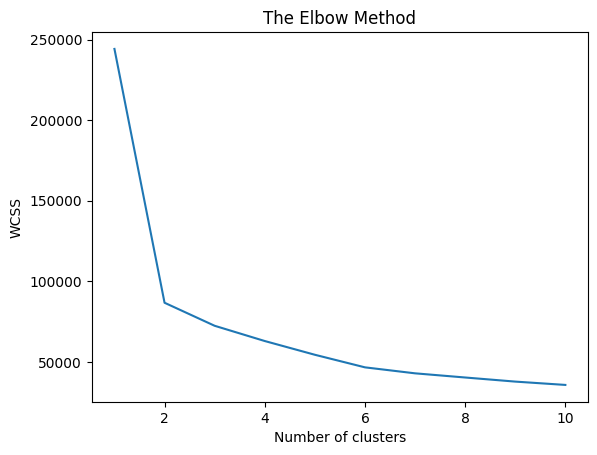

In [15]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Test Train split

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Model

In [23]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 73)
kmeans.fit_transform(X)
y_pred = kmeans.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
y_pred = pd.DataFrame(y_pred)
y_pred.value_counts()

4    111728
3    110392
0     85736
5      8997
1      8734
2      8415
Name: count, dtype: int64

# Result Visualization and Evaluation

## Confusion Matrix

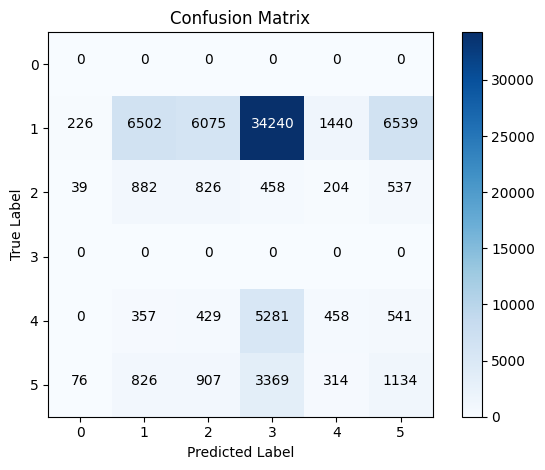

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y, y_pred, labels=[0,1,2,3,4,5])

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len([0,1,2,3,4,5]))
plt.xticks(tick_marks, [0,1,2,3,4,5])
plt.yticks(tick_marks, [0,1,2,3,4,5])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

# Now Applying Feature Extraction and Engineering

In [34]:
ds.drop(['thigh_x', 'thigh_y', 'thigh_z'], axis = 1, inplace = True)
ds.rename(columns = {'back_y': 'y', 'back_x': 'x', 'back_z': 'z'}, inplace = True)

In [39]:
ds.head()

,x,y,z,label
0,-0.999492,0.023192,0.025461,6
1,-0.995551,0.021414,0.042297,6
2,-0.989507,0.012187,0.038830,6
3,-0.991327,0.015926,0.056181,6
4,-0.997368,0.014239,0.035168,6
